# Tiktok Transcript Analysis

What does this notebook tell us:
* Which ingredient is more popular?
* Which Beiersdorf brand is more popular?
* Which routine is more popular for evening or morning?



We have a kaggle dataset for cosmetics brands and the categories

In [1]:
import pandas as pd
tiktok_transcrips = pd.read_csv('../data/comments_posts_transcripts.csv')


In [3]:
import pandas as pd


cosmetics=pd.read_csv("/Users/ritushetkar/env_capstone/skincare_analysis/data/most_used_beauty_cosmetics_products_extended.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ritushetkar/env_capstone/skincare_analysis/data/most_used_beauty_cosmetics_products_extended.csv'

In [3]:
len(tiktok_transcrips['id'].unique())

5489

Combining the transcripts and the video description. 

In [4]:

tiktok_transcrips['combined_text'] = tiktok_transcrips['transcribed_text'].fillna('') + " " + tiktok_transcrips['video_description'].fillna('')
tiktok_transcrips['combined_text'] = tiktok_transcrips['combined_text'].str.lower()


### BRANDS from Cosmetics (Kaggle Dataset)

In [5]:
cosmetics.columns

Index(['Product_Name', 'Brand', 'Category', 'Usage_Frequency', 'Price_USD',
       'Rating', 'Number_of_Reviews', 'Product_Size', 'Skin_Type',
       'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free',
       'Country_of_Origin'],
      dtype='object')

In [6]:
print(len(cosmetics['Brand'].unique())) #40 brands
cosmetics['Brand'].unique()

40


array(['Drunk Elephant', 'Laura Mercier', 'Natasha Denona', 'Ilia Beauty',
       'Charlotte Tilbury', 'Danessa Myricks', 'Bourjois', 'IT Cosmetics',
       'Fenty Beauty', 'Sisley', 'Juvia’s Place', 'NARS', 'ColourPop',
       'Huda Beauty', 'Tatcha', 'Kiehl’s', 'Tarte', 'Glossier',
       'Make Up For Ever', 'Anastasia Beverly Hills', 'E.l.f.',
       'Hourglass', 'Pat McGrath Labs', 'Too Faced', 'Perricone MD',
       'RMS Beauty', 'Urban Decay', 'Rare Beauty', 'Becca', 'Patrick Ta',
       'Shiseido', 'Kylie Cosmetics', 'Bite Beauty', 'Yves Saint Laurent',
       'Bobby Brown', 'Farsali', 'Morphe', 'Milk Makeup', 'Clinique',
       'KVD Beauty'], dtype=object)

In [7]:
print(len(cosmetics['Category'].unique())) #24 categories
cosmetics['Category'].unique()

24


array(['Blush', 'Makeup Remover', 'Highlighter', 'Face Mask',
       'Foundation', 'Powder', 'Lip Gloss', 'CC Cream', 'Eye Shadow',
       'Concealer', 'Eyeliner', 'Lipstick', 'Setting Spray', 'Cleanser',
       'Bronzer', 'Primer', 'Face Oil', 'Contour', 'Mascara', 'Serum',
       'BB Cream', 'Exfoliator', 'Lip Liner', 'Moisturizer'], dtype=object)

In [8]:
print(len(cosmetics['Skin_Type'].unique())) #5 categories
cosmetics['Skin_Type'].unique()

5


array(['Sensitive', 'Dry', 'Normal', 'Oily', 'Combination'], dtype=object)

In [9]:
print(len(cosmetics['Main_Ingredient'].unique())) #7 categories
cosmetics['Main_Ingredient'].unique()

7


array(['Retinol', 'Shea Butter', 'Aloe Vera', 'Glycerin',
       'Hyaluronic Acid', 'Vitamin C', 'Salicylic Acid'], dtype=object)

### Tiktok_Transcripts

In [10]:
tiktok_transcrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5489 non-null   int64  
 1   bucketUrl          5488 non-null   object 
 2   detected_language  5437 non-null   object 
 3   transcribed_text   5322 non-null   object 
 4   video_description  5488 non-null   object 
 5   status             5489 non-null   object 
 6   tokens_used        5488 non-null   float64
 7   error_message      102 non-null    object 
 8   created_at         5489 non-null   object 
 9   updated_at         5489 non-null   object 
 10  combined_text      5489 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 471.8+ KB


In [11]:
tiktok_transcrips.groupby('detected_language').count().sort_values(by ='id',ascending=False)

,id,bucketUrl,transcribed_text,video_description,status,tokens_used,error_message,created_at,updated_at,combined_text
detected_language,,,,,,,,,,
English,2352,2352,2338,2352,2352,2352,2,2352,2352,2352
German,1719,1719,1708,1719,1719,1719,8,1719,1719,1719
en,223,223,221,223,223,223,1,223,223,223
Spanish,143,143,141,143,143,143,1,143,143,143
Indonesian,134,134,134,134,134,134,0,134,134,134
...,...,...,...,...,...,...,...,...,...,...
Tamil,1,1,1,1,1,1,0,1,1,1
Tagalog,1,1,1,1,1,1,0,1,1,1
Silence,1,1,1,1,1,1,0,1,1,1


### Cleaning the English to en and German to de

In [12]:
tiktok_transcrips['detected_language'] = tiktok_transcrips['detected_language'].replace({'English': 'en'})
tiktok_transcrips['detected_language'] = tiktok_transcrips['detected_language'].replace({'German': 'de'})

In [13]:
len(tiktok_transcrips['id'].unique())

5489

If we filter out the languages we loose about 1000 transcripts

In [14]:
tiktok_transcrips['detected_language'].unique()

array(['Albanian', 'Arabic', 'Dutch', 'en', 'French', 'de', 'Indonesian',
       'Korean', 'Music', 'No', nan, 'Portuguese', 'Russian', 'Shona',
       'Spanish', 'Turkish', 'Undetermined', 'Unknown', 'Vietnamese',
       'Polish', 'Urdu', 'Amharic', 'Azerbaijani', 'Bosnian', 'Chinese',
       'Czech', 'Filipino', 'Instrumental', 'Thai', 'Bulgarian', 'Not',
       'none', 'Bengali', 'Croatian', 'Danish', 'Greek', 'Hindi', 'Igbo',
       'Italian', 'Japanese', 'Khmer', 'Mandarin', 'Multiple', 'N',
       'Nepali', 'Persian', 'Romanian', 'Serbian', 'Silence', 'Somali',
       'Soomaali', 'Swahili', 'Swedish', 'Swiss', 'Tamil', 'Ukrainian',
       'Wolof', 'Yoruba', 'ar', 'es', 'ja', 'no', 'und', 'Uyghur',
       'Georgian', 'Hungarian', 'Panjabi', 'Tagalog', 'fr'], dtype=object)

In [15]:
tiktok_transcrips[tiktok_transcrips['detected_language']=='de'].head(2)

,id,bucketUrl,detected_language,transcribed_text,video_description,status,tokens_used,error_message,created_at,updated_at,combined_text
96,7034893625821498630,https://storage.cloud.google.com/capstone-soci...,de,"Hello, liebe Leute, heute gibt es meine Morgen...","In this video, a woman shares her morning rout...",completed,17313.0,NaN,2025-03-24 08:40:13.940018 UTC,2025-03-25 19:10:24.359129 UTC,"hello, liebe leute, heute gibt es meine morgen..."
97,7100544112897674502,https://storage.cloud.google.com/capstone-soci...,de,Skincare für Anfänger mit Sonne. Hi! Das hier ...,A man in a striped shirt talks about the impor...,completed,16894.0,NaN,2025-03-24 08:40:13.940018 UTC,2025-03-25 19:10:21.568615 UTC,skincare für anfänger mit sonne. hi! das hier ...


detected_language is the transcribed_text language which is not necessarily the same form that of video_description

In [16]:
import langid
tiktok_transcrips['video_description_lang'] = tiktok_transcrips['video_description'].apply(lambda x: langid.classify(x)[0] if isinstance(x, str) else 'unknown')

In [17]:
tiktok_transcrips['video_description_lang'].unique()

array(['sq', 'en', 'it', 'de', 'pt', 'es', 'pl', 'unknown', 'am', 'fr',
       'id', 'ro', 'ru', 'tr', 'ar', 'ja', 'el', 'la'], dtype=object)

In [18]:
tiktok_transcrips_filtered = tiktok_transcrips[tiktok_transcrips['detected_language'].isin(['en', 'de']) | tiktok_transcrips['video_description_lang'].isin(['en', 'de'])]
len(tiktok_transcrips_filtered['id'].unique())

5337

In [19]:
tiktok_transcrips_filtered[tiktok_transcrips_filtered['video_description_lang']=='it'].head(2) #No description available. is stored as it


,id,bucketUrl,detected_language,transcribed_text,video_description,status,tokens_used,error_message,created_at,updated_at,combined_text,video_description_lang
48,7406291048965672209,https://storage.cloud.google.com/capstone-soci...,en,don't need those other moisturizers... when I ...,No description available.,completed,3000.0,NaN,2025-03-24 08:40:13.940018 UTC,2025-03-25 17:10:15.294869 UTC,don't need those other moisturizers... when i ...,it
61,7330682186779135265,https://storage.cloud.google.com/capstone-soci...,en,But just know you never met somebody like me b...,No description available.,completed,4136.0,NaN,2025-03-24 08:40:13.940018 UTC,2025-03-25 19:11:11.412146 UTC,but just know you never met somebody like me b...,it


Filtering out the status of completed ai transcriptions from failed

In [20]:
transcripts_text_filtered=tiktok_transcrips_filtered[tiktok_transcrips_filtered['status']=='completed']

In [21]:
transcripts_text_filtered.columns

Index(['id', 'bucketUrl', 'detected_language', 'transcribed_text',
       'video_description', 'status', 'tokens_used', 'error_message',
       'created_at', 'updated_at', 'combined_text', 'video_description_lang'],
      dtype='object')

### Basic Ingredients

In [22]:
basic_ingredients=ingredients = [
    "hyaluronic acid", "hyaluronsäure",
    "glycerin",
    "panthenol",
    "squalane", "squalan",
    "aloe vera",
    "niacinamide", "niacinamid",
    "vitamin c",
    "alpha arbutin", "alpha-arbutin",
    "licorice root", "lakritzextrakt",
    "kojic acid", "kojicsäure",
    "retinol",
    "peptides", "peptide",
    "bakuchiol",
    "coenzyme q10", "coenzym q10",
    "ceramides", "ceramide",
    "salicylic acid", "salicylsäure",
    "glycolic acid", "glycolsäure",
    "lactic acid", "milchsäure",
    "pha",
    "benzoyl peroxide", "benzoylperoxid",
    "centella asiatica", "tigergras",
    "green tea", "grüner tee",
    "allantoin",
    "calendula", "ringelblume",
    "chamomile", "kamille"
]



### Beiersdorf Products

In [23]:
beiersdorf_products=['nivea','eucerin','hansaplast','la prairie','chantecaille','coppertone','labello','8x4','hidrougal','tesa','florena','skin stories','gammon']



# Text Analysis for Beiersdorf Brands, Brands, Ingredients, Categories (blush, creams etc) and SkinType

Counting the instances of basic Paula Choice ingridients.


In [24]:
tiktok_transcrips_filtered.columns

Index(['id', 'bucketUrl', 'detected_language', 'transcribed_text',
       'video_description', 'status', 'tokens_used', 'error_message',
       'created_at', 'updated_at', 'combined_text', 'video_description_lang'],
      dtype='object')

In [25]:
#convert to lowercase
tiktok_transcrips_filtered['combined_text'] = tiktok_transcrips_filtered['video_description'].fillna('').astype(str).str.lower()

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_1022/2914450645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_transcrips_filtered['combined_text'] = tiktok_transcrips_filtered['video_description'].fillna('').astype(str).str.lower()


In [26]:
def presence_col(text, keyword):
    return int(keyword in text)


## Beiersdorf products

In [27]:
product_mentions_df = pd.DataFrame()
for product in beiersdorf_products:
    product_mentions_df[product] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, product))

product_counts = product_mentions_df.sum().reset_index()
product_counts.columns = ['product', 'mention_count']

product_counts.sort_values(by='mention_count', ascending=False)

,product,mention_count
0,nivea,76
1,eucerin,18
3,la prairie,4
6,labello,3
2,hansaplast,1
4,chantecaille,0
5,coppertone,0
7,8x4,0
8,hidrougal,0
9,tesa,0


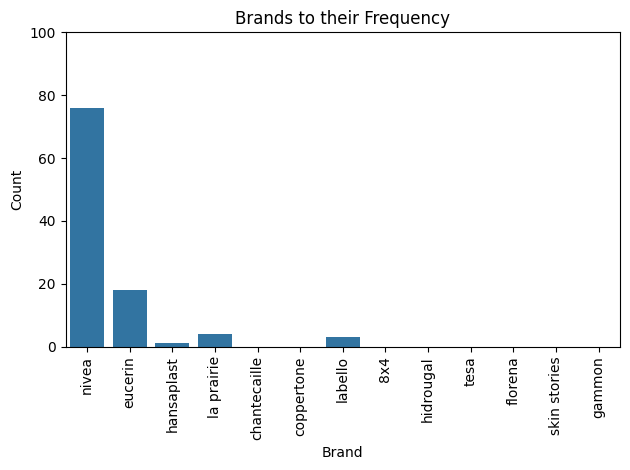

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='product', y='mention_count', data=product_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brands to their Frequency')

# Set the y-axis limit to 100
plt.ylim(0, 100
         )

# Display the plot
plt.tight_layout()
plt.show()

## Ingredients Counts

In [29]:
ingredient_mentions_df = pd.DataFrame()
for ingredient in basic_ingredients:
    ingredient_mentions_df[ingredient] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, ingredient))

In [30]:
ingredient_counts = ingredient_mentions_df.sum().reset_index()
ingredient_counts.columns = ['ingredient', 'mention_count']
ingredient_counts.sort_values(by='mention_count', ascending=False)

,ingredient,mention_count
9,vitamin c,280
30,pha,200
8,niacinamid,187
16,retinol,182
7,niacinamide,168
0,hyaluronic acid,154
18,peptide,105
3,panthenol,76
24,salicylic acid,70
23,ceramide,69


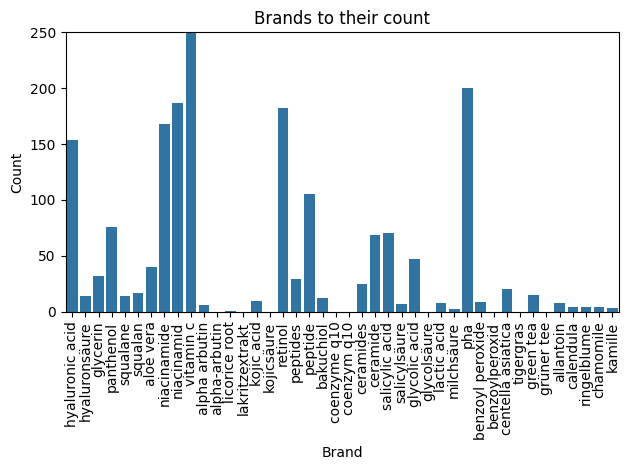

In [111]:

sns.barplot(x='ingredient', y='mention_count', data=ingredient_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brands to their count')

# Set the y-axis limit to 100
plt.ylim(0, 250)

# Display the plot
plt.tight_layout()
plt.show()



### Using the Cosmetics dataset from Kaggle

In [32]:
import numpy as np

# Assume Categories is the array
Categories = np.array([
    'Blush', 'Makeup Remover', 'Highlighter', 'Face Mask',
    'Foundation', 'Powder', 'Lip Gloss', 'CC Cream', 'Eye Shadow',
    'Concealer', 'Eyeliner', 'Lipstick', 'Setting Spray', 'Cleanser',
    'Bronzer', 'Primer', 'Face Oil', 'Contour', 'Mascara', 'Serum',
    'BB Cream', 'Exfoliator', 'Lip Liner', 'Moisturizer'
])

# Convert all elements to lowercase
Categories_lower = np.char.lower(Categories)

Brands=np.array(['Drunk Elephant', 'Laura Mercier', 'Natasha Denona', 'Ilia Beauty',
       'Charlotte Tilbury', 'Danessa Myricks', 'Bourjois', 'IT Cosmetics',
       'Fenty Beauty', 'Sisley', 'Juvia’s Place', 'NARS', 'ColourPop',
       'Huda Beauty', 'Tatcha', 'Kiehl’s', 'Tarte', 'Glossier',
       'Make Up For Ever', 'Anastasia Beverly Hills', 'E.l.f.',
       'Hourglass', 'Pat McGrath Labs', 'Too Faced', 'Perricone MD',
       'RMS Beauty', 'Urban Decay', 'Rare Beauty', 'Becca', 'Patrick Ta',
       'Shiseido', 'Kylie Cosmetics', 'Bite Beauty', 'Yves Saint Laurent',
       'Bobby Brown', 'Farsali', 'Morphe', 'Milk Makeup', 'Clinique',
       'KVD Beauty', 'La Roche Posay']
)

Brands_lower=np.char.lower(Brands)

SkinType= np.array(['Sensitive', 'Dry', 'Normal', 'Oily', 'Combination'])
SkinType_lower=np.char.lower(SkinType)




#### Categories 

In [33]:
categoriries_df = pd.DataFrame()

for category in Categories_lower:
    categoriries_df[category] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, category))


categories_count = categoriries_df.sum().reset_index()
categories_count.columns = ['category', 'mention_count']
categories_count.sort_values(by='mention_count', ascending=False)



,category,mention_count
19,serum,1406
13,cleanser,790
23,moisturizer,732
3,face mask,256
5,powder,72
4,foundation,58
6,lip gloss,48
0,blush,34
9,concealer,33
1,makeup remover,31


#### Brands

In [34]:
Brands_df = pd.DataFrame()

for brand in Brands_lower:
    Brands_df[brand] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, brand))


brand_count = Brands_df.sum().reset_index()
brand_count.columns = ['brand', 'mention_count']
brand_count.sort_values(by='mention_count', ascending=False)



,brand,mention_count
40,la roche posay,28
16,tarte,24
0,drunk elephant,24
38,clinique,14
14,tatcha,13
4,charlotte tilbury,9
27,rare beauty,6
37,milk makeup,5
30,shiseido,5
17,glossier,4


#### Skintype

In [35]:
SkinType = pd.DataFrame()

for skintype in SkinType_lower:
    SkinType[skintype] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, skintype))


skintype_count = SkinType.sum().reset_index()
skintype_count.columns = ['SkinType', 'mention_count']
skintype_count.sort_values(by='mention_count', ascending=False)

,SkinType,mention_count
1,dry,358
0,sensitive,145
3,oily,124
2,normal,51
4,combination,51


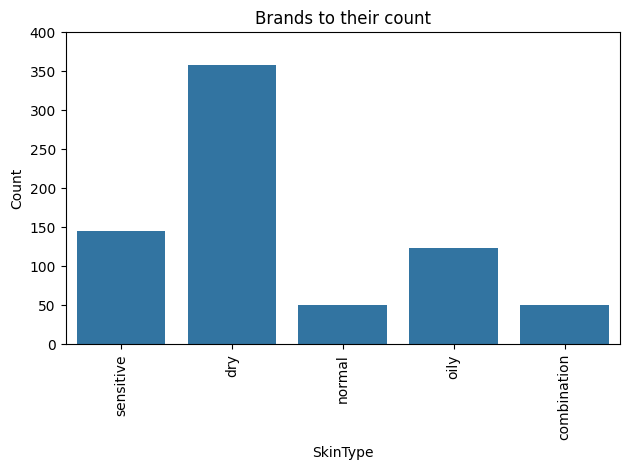

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='SkinType', y='mention_count', data=skintype_count)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('SkinType')
plt.ylabel('Count')
plt.title('Brands to their count')

# Set the y-axis limit to 100
plt.ylim(0, 400)

# Display the plot
plt.tight_layout()
plt.show()



## More Ingredient Analysis

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import locale
from datetime import datetime
from transformers import pipeline


# Set matplotlib to use English for dates
try:
    locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')
except locale.Error:
    locale.setlocale(locale.LC_TIME, 'C')

# Load and Prepare Data
df = pd.read_csv("../data/comments_posts_transcripts.csv")

# Basic cleaning and filtering
df = df[df["comment"].notna() & (df["playCount"] > 0)].copy()
df["comment"] = df["comment"].astype(str).str.lower()
df["createTimeISO"] = pd.to_datetime(df["createTimeISO"])

# Filter to last 6 months
six_months_ago = pd.Timestamp(datetime.today() - pd.DateOffset(months=6), tz="UTC")
df = df[df["createTimeISO"] >= six_months_ago]

# Add week column
df["week"] = df["createTimeISO"].dt.to_period("W").dt.start_time

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_26566/765674746.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week"] = df["createTimeISO"].dt.to_period("W").dt.start_time


Definition of ingredients

In [ ]:
# Define a mapping of synonyms (EN/DE) to unified ingredient names from the file from Peaks & Pies
ingredient_map = pd.read_csv("data/Ingredient Mapping.csv")

Matching ingredients in comments

In [ ]:
def find_ingredient(comment_text):
    if pd.isnull(comment_text):
        return []
    matched = set()
    for canonical, synonyms in ingredient_map.items():
        for term in synonyms:
            if re.search(rf"(?<!\w){re.escape(term)}(?!\w)", comment_text):
                matched.add(canonical)
                break
    return list(matched)

df["matched_ingredients"] = df["comment"].apply(find_ingredient)

Time Series Analysis - top ingredients in comments

<Figure size 1400x600 with 0 Axes>

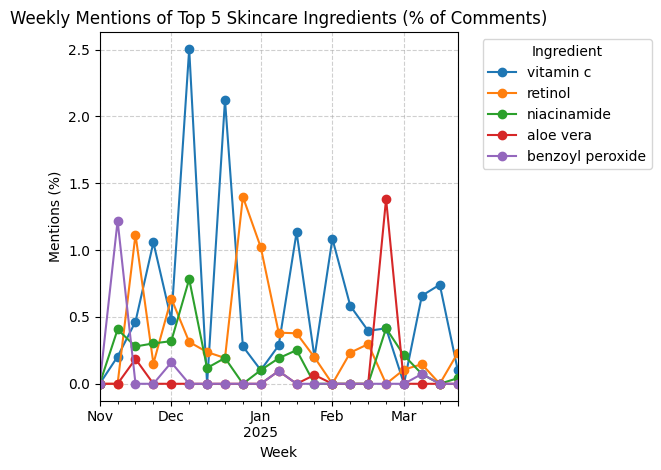

In [ ]:
# Build flat list for ingredient/week counts
ingredient_mentions = []
for _, row in df[["week", "matched_ingredients"]].dropna().iterrows():
    for ingredient in row["matched_ingredients"]:
        ingredient_mentions.append((row["week"], ingredient))

df_mentions = pd.DataFrame(ingredient_mentions, columns=["week", "ingredient"])

# Weekly counts
weekly_counts = df_mentions.groupby(["week", "ingredient"]).size().reset_index(name="mention_count")

# Total comments per week
comments_per_week = df.groupby("week")["comment"].count().reset_index(name="total_comments")

# Merge and normalize
weekly_counts = weekly_counts.merge(comments_per_week, on="week", how="left")
weekly_counts["mention_percent"] = (weekly_counts["mention_count"] / weekly_counts["total_comments"]) * 100

# Pivot and plot top 5
pivot_df = weekly_counts.pivot(index="week", columns="ingredient", values="mention_percent").fillna(0)
top_5 = pivot_df.sum().sort_values(ascending=False).head(5).index
pivot_df = pivot_df[top_5]

plt.figure(figsize=(14, 6))
pivot_df.plot(marker="o")
plt.title("Weekly Mentions of Top 5 Skincare Ingredients (% of Comments)")
plt.xlabel("Week")
plt.ylabel("Mentions (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Ingredient", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Aggregate Stats (absolute + normalized mentions)

In [ ]:
normalized_mentions = (
    weekly_counts.groupby("ingredient")["mention_percent"]
    .sum()
    .reset_index()
    .rename(columns={"mention_percent": "mention_percent_total"})
)

absolute_counts = (
    df_mentions.groupby("ingredient")
    .size()
    .reset_index(name="mention_count")
)

ingredient_stats_full = pd.merge(absolute_counts, normalized_mentions, on="ingredient", how="left")
ingredient_stats_full = ingredient_stats_full.sort_values(by="mention_count", ascending=False).reset_index(drop=True)

print("Normalized Ingredient Stats:")
print(ingredient_stats_full.head(20))

Normalized Ingredient Stats:
           ingredient  mention_count  mention_percent_total
0           vitamin c            108              12.815918
1             retinol             71               7.038381
2         niacinamide             29               3.688334
3           aloe vera             14               1.730738
4     hyaluronic acid             14               1.230049
5           bakuchiol             10               1.451606
6    benzoyl peroxide              9               1.547811
7           ceramides              7               0.687046
8           panthenol              7               1.177826
9            peptides              7               0.760052
10      glycolic acid              6               0.535915
11          green tea              6               0.552503
12     salicylic acid              6               0.647394
13           glycerin              5               0.378624
14                pha              4               0.355899
15  centell

Engagement Analysis (for ingredients with ≥20 mentions)

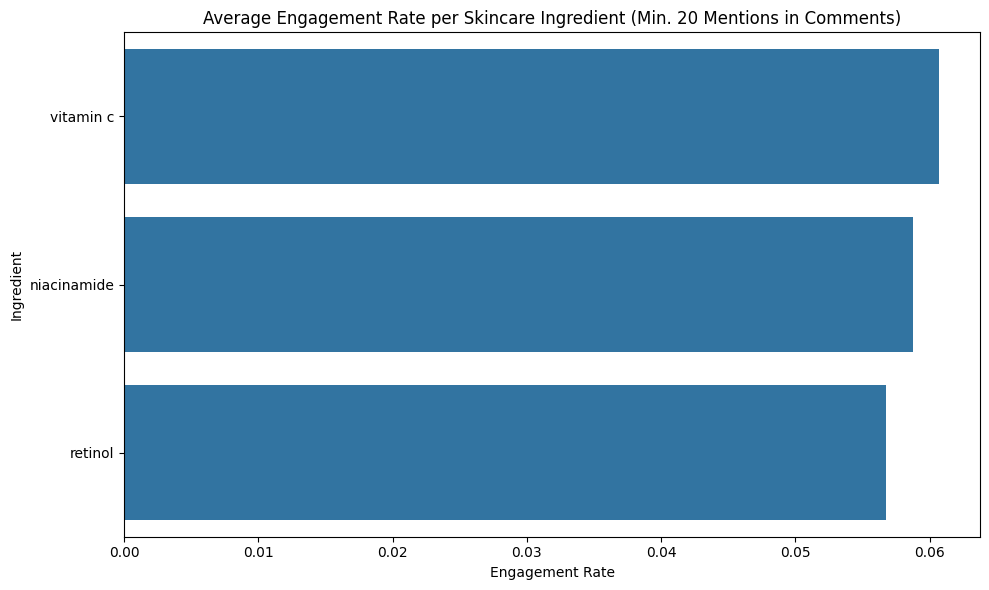

In [ ]:
df_filtered = df[df["matched_ingredients"].str.len() > 0].copy()
df_filtered["engagement_rate"] = (
    df_filtered["diggCount"] + df_filtered["commentCount"] + df_filtered["shareCount"]
) / df_filtered["playCount"]

df_exploded = df_filtered.explode("matched_ingredients")

ingredient_counts = (
    df_exploded.groupby("matched_ingredients")
    .size()
    .reset_index(name="mention_count")
)

valid_ingredients = ingredient_counts[ingredient_counts["mention_count"] >= 20]["matched_ingredients"]
df_exploded_filtered = df_exploded[df_exploded["matched_ingredients"].isin(valid_ingredients)]

ingredient_stats = (
    df_exploded_filtered.groupby("matched_ingredients")["engagement_rate"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=ingredient_stats, x="engagement_rate", y="matched_ingredients")
plt.title("Average Engagement Rate per Skincare Ingredient (Min. 20 Mentions in Comments)")
plt.xlabel("Engagement Rate")
plt.ylabel("Ingredient")
plt.tight_layout()
plt.show()

Sentiment analysis per ingredient

In [ ]:
sentiment_pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest", batch_size=32)

# Sentiment function
def analyze_sentiment(text):
    try:
        result = sentiment_pipe(text, truncation=True, max_length=512)[0]
        return pd.Series({
            "sentiment": result["label"],
            "confidence": result["score"]
        })
    except Exception:
        return pd.Series({
            "sentiment": "error",
            "confidence": 0.0
        })

# Apply only on rows with matched ingredients
df_sentiment = df[df["matched_ingredients"].str.len() > 0].copy()
df_sentiment[["sentiment", "confidence"]] = df_sentiment["comment"].apply(analyze_sentiment)

# Explode to 1 row per ingredient
df_sentiment_exploded = df_sentiment.explode("matched_ingredients")

# Group by ingredient and sentiment
ingredient_sentiment = (
    df_sentiment_exploded.groupby(["matched_ingredients", "sentiment"])
    .size()
    .reset_index(name="count")
)

# Pivot for wide format
ingredient_sentiment_pivot = ingredient_sentiment.pivot(
    index="matched_ingredients", columns="sentiment", values="count"
).fillna(0)

# Absolute total mentions
ingredient_sentiment_pivot["total_mentions"] = ingredient_sentiment_pivot.sum(axis=1)

# Normalize to percentage
ingredient_sentiment_pct = ingredient_sentiment_pivot.div(ingredient_sentiment_pivot["total_mentions"], axis=0) * 100

# Re-attach the absolute counts as a column (not normalized)
ingredient_sentiment_pct["total_mentions"] = ingredient_sentiment_pivot["total_mentions"]

# Sort by total_mentions
ingredient_sentiment_pct = ingredient_sentiment_pct.sort_values(by="total_mentions", ascending=False)

# Show top 30
ingredient_sentiment_pct.head(30)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


sentiment,negative,neutral,positive,total_mentions
matched_ingredients,,,,
vitamin c,9.259259,61.111111,29.629630,108.0
retinol,16.901408,64.788732,18.309859,71.0
niacinamide,20.689655,72.413793,6.896552,29.0
aloe vera,7.142857,42.857143,50.000000,14.0
hyaluronic acid,35.714286,57.142857,7.142857,14.0
bakuchiol,10.000000,30.000000,60.000000,10.0
benzoyl peroxide,44.444444,33.333333,22.222222,9.0
ceramides,0.000000,71.428571,28.571429,7.0
panthenol,42.857143,42.857143,14.285714,7.0


Plot sentiment analysis

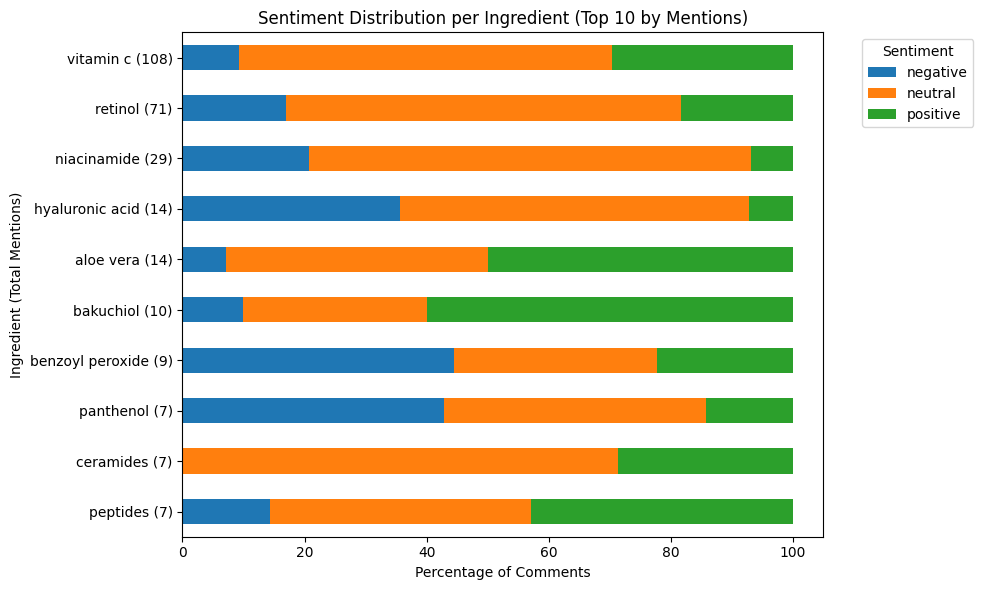

In [ ]:
# Select top 10 ingredients based on total_mentions
top_ingredients = ingredient_sentiment_pct.sort_values(by="total_mentions", ascending=False).head(10)

# Sort left-to-right by total_mentions
top_ingredients = top_ingredients.sort_values(by="total_mentions", ascending=True)

# Create new index labels with total mention count
renamed_index = [
    f"{ingredient} ({int(total)})"
    for ingredient, total in zip(top_ingredients.index, top_ingredients["total_mentions"])
]

# Select only sentiment columns (exclude total_mentions)
sentiment_cols = [col for col in top_ingredients.columns if col not in ["total_mentions"]]

# Re-assign index to include mention count in labels
top_ingredients_sentiments = top_ingredients[sentiment_cols]
top_ingredients_sentiments.index = renamed_index

# Plot stacked bar chart
top_ingredients_sentiments.plot(kind="barh", stacked=True, figsize=(10, 6))  # horizontal for better label fit
plt.title("Sentiment Distribution per Ingredient (Top 10 by Mentions)")
plt.xlabel("Percentage of Comments")
plt.ylabel("Ingredient (Total Mentions)")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Representative comments per sentiment and ingredient

In [ ]:
# Step 1: Filter to valid sentiments only
df_sentiment_clean = df_sentiment_exploded[
    df_sentiment_exploded["sentiment"].isin(["positive", "neutral", "negative"])
]

# Step 2: Get ingredients with >20 mentions
ingredient_counts = df_sentiment_clean["matched_ingredients"].value_counts()
frequent_ingredients = ingredient_counts[ingredient_counts > 20].index

# Step 3: Filter to those frequent ingredients only
df_sentiment_clean = df_sentiment_clean[df_sentiment_clean["matched_ingredients"].isin(frequent_ingredients)]

# Step 4: Select one top-confidence comment per ingredient & sentiment
example_comments = (
    df_sentiment_clean.sort_values(by="confidence", ascending=False)
    .groupby(["matched_ingredients", "sentiment"])
    .first()
    .reset_index()[["matched_ingredients", "sentiment", "comment", "confidence"]]
)

# Optional: sort for easier readability
example_comments = example_comments.sort_values(by=["matched_ingredients", "sentiment"])

# Show the result
example_comments.head(30)


,matched_ingredients,sentiment,text_comment,confidence
0,niacinamide,negative,my skin hate niacinamide 🧢,0.914544
1,niacinamide,neutral,can i use it with the ordinary niacinamide?,0.924256
2,niacinamide,positive,i am using anua niacinamide and madacascar cen...,0.962521
3,retinol,negative,retinol damaged my skin barrier and gives me p...,0.918552
4,retinol,neutral,retinol??? which one do you rec?,0.948808
5,retinol,positive,so honored to be your retinol ❤️❤️❤️❤️,0.986338
6,vitamin c,negative,vitamin c is always way too expensive ☹️,0.918800
7,vitamin c,neutral,is it ok to have a vitamin c serum combined wi...,0.934136
8,vitamin c,positive,that's vitamin c i will invest in 🌸🌸🌸 love it 🎀🎀🎀,0.988166


# Common Routines

##### Basic counts of routine_steps

Here we have some routine steps that chatgpt and google defined. 

In [37]:


routine_steps = [
    'cleanse', 'double cleanse', 'toner', 'serum', 'moisturizer',
    'eye cream', 'sunscreen', 'exfoliate', 'mask', 'face massage',
    'treatment', 'essence', 'oil', 'spot treatment', 'primer'
]

# 4. Function to find routine steps mentioned in the text
def find_routine_steps(text, routine_steps_list):
    found = [step for step in routine_steps_list if step in text]
    return found

# 5. Apply the function to the combined text
tiktok_transcrips['found_routine_steps'] = tiktok_transcrips['combined_text'].apply(lambda x: find_routine_steps(x, routine_steps))


# 7. (Bonus) Create a frequency table of routine steps
# Explode list into rows
all_steps = tiktok_transcrips['found_routine_steps'].explode()

# Count occurrences
step_counts = all_steps.value_counts()

# Print most common steps
print("\nMost common skincare steps mentioned:")
step_counts



Most common skincare steps mentioned:


found_routine_steps
serum             1756
cleanse           1103
mask               933
toner              911
moisturizer        909
oil                885
sunscreen          504
treatment          346
eye cream          310
essence            220
exfoliate          136
double cleanse      86
primer              83
spot treatment      41
face massage        13
Name: count, dtype: int64

##### Finding out the timing of the transcription

We try to find the time keywords in the transcripts based on some known keywords of time

In [60]:
# Step 1: Extract time-related keywords from the text
def find_time_of_day(text):
    time_keywords = ['morning', 'am', 'night', 'pm','start of the day', 'end of the day', 'evening']
    time_of_day = None

    # Check if any time-related keyword is in the text
    for keyword in time_keywords:
        if keyword in text:
            if 'morning' in keyword or 'am' in keyword or 'start of the day' in keyword:
                time_of_day = 'morning'
            elif 'night' in keyword or 'pm'  in keyword or 'end of the day' in keyword or 'evening' in keyword:
                time_of_day = 'night'
    
    return time_of_day

# Step 2: Function to identify which skincare routine steps are mentioned
def find_routine_steps(text, routine_steps_list):
    found = [step for step in routine_steps_list if step in text]
    return found


# Extract time of day and routine steps
tiktok_transcrips['time_of_day'] = tiktok_transcrips['combined_text'].apply(find_time_of_day)
tiktok_transcrips['found_routine_steps'] = tiktok_transcrips['combined_text'].apply(lambda x: find_routine_steps(x, routine_steps))

# Step 4: Exploding the found routine steps to count occurrences
exploded_routine_steps = tiktok_transcrips.explode('found_routine_steps')

# Step 5: Group by time of day and skincare routine step
routine_by_time = exploded_routine_steps.groupby(['time_of_day', 'found_routine_steps']).size().unstack(fill_value=0)

# Step 6: Calculate percentages for each routine step by time of day
routine_percentage_by_time = routine_by_time.div(routine_by_time.sum(axis=1), axis=0) * 100

# Print the percentage distribution of each routine step by time of day
print("Routine Step Percentages by Time of Day:")
routine_percentage_by_time





Routine Step Percentages by Time of Day:


found_routine_steps,cleanse,double cleanse,essence,exfoliate,eye cream,face massage,mask,moisturizer,oil,primer,serum,spot treatment,sunscreen,toner,treatment
time_of_day,,,,,,,,,,,,,,,
morning,13.870777,0.266746,3.200948,1.066983,5.720213,0.148192,10.254890,10.165975,9.958506,0.207469,22.554831,0.266746,7.053942,12.270302,2.993480
night,15.825170,0.979653,2.562170,0.828937,5.727204,0.301432,12.283346,12.057272,10.625471,0.000000,19.894499,0.527506,4.521477,10.474755,3.391108


#### Using the sentence, step, time and sentiment

Trying to separate the sentences within the transcripts


In [39]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

# Download tokenizer if not already
nltk.download('punkt')

# Step 1: Define routine steps and time keywords
routine_steps = [
    'cleanse', 'double cleanse', 'toner', 'serum', 'moisturizer',
    'eye cream', 'sunscreen', 'exfoliate', 'mask', 'face massage',
    'treatment', 'essence', 'oil', 'spot treatment', 'primer'
]

time_keywords = ['morning', 'am', 'night', 'pm', 'start of the day', 'end of the day', 'evening']

# Step 2: Combine and clean text
tiktok_transcrips['combined_text'] = (
    tiktok_transcrips['transcribed_text'].fillna('') + ' ' +
    tiktok_transcrips['video_description'].fillna('')
).str.lower()

# Step 3: Split text into sentences
tiktok_transcrips['sentences'] = tiktok_transcrips['combined_text'].apply(sent_tokenize)

# Step 4: Analyze each sentence
def analyze_sentence(sentence, routine_steps, time_keywords):
    results = []
    
    # Detect time of day
    time = None
    for keyword in time_keywords:
        if keyword in sentence:
            if keyword in ['morning', 'am', 'start of the day', 'begin the day','wake up']:
                time = 'morning'
            elif keyword in ['night', 'pm', 'evening', 'end of the day', 'before sleeping']:
                time = 'night'
            break
    
    # Sentiment
    sentiment_score = TextBlob(sentence).sentiment.polarity
    sentiment = 'positive' if sentiment_score > 0.1 else 'negative' if sentiment_score < -0.1 else 'neutral'

    # Routine steps
    steps_found = [step for step in routine_steps if step in sentence]

    for step in steps_found:
        results.append({
            'sentence': sentence,
            'step': step,
            'time_of_day': time,
            'sentiment': sentiment
        })
    
    return results

# Step 5: Apply to all rows
extracted_data = []

for _, row in tiktok_transcrips.iterrows():
    for sentence in row['sentences']:
        extracted_data.extend(analyze_sentence(sentence, routine_steps, time_keywords))

# Step 6: Create final DataFrame
df_sentence_level = pd.DataFrame(extracted_data)

# Optional: View counts
print(df_sentence_level.head())
print(df_sentence_level['time_of_day'].value_counts())
print(df_sentence_level['sentiment'].value_counts())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ritushetkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            sentence       step time_of_day  \
0  she reviews a double cleansing technique, how ...  exfoliate        None   
1  she reviews a double cleansing technique, how ...       mask        None   
2  product recommendations include paula's choice...       mask        None   
3  she shows before-and-after photos of her skin ...  treatment        None   
4  in this video, a beauty professional is perfor...  treatment        None   

  sentiment  
0   neutral  
1   neutral  
2  negative  
3   neutral  
4   neutral  
time_of_day
morning    4511
night       347
Name: count, dtype: int64
sentiment
neutral     10329
positive     3510
negative      820
Name: count, dtype: int64


In [40]:
df_sentence_level.head()

,sentence,step,time_of_day,sentiment
0,"she reviews a double cleansing technique, how ...",exfoliate,None,neutral
1,"she reviews a double cleansing technique, how ...",mask,None,neutral
2,product recommendations include paula's choice...,mask,None,negative
3,she shows before-and-after photos of her skin ...,treatment,None,neutral
4,"in this video, a beauty professional is perfor...",treatment,None,neutral


In [41]:
df_sentence_level['time_of_day'].unique()


array([None, 'morning', 'night'], dtype=object)

Here we, see for sunscreen the basic sentiment. Morning is the most as postive (based on frequency). 

In [42]:
routines_transcripts_sentments=df_sentence_level.groupby(['time_of_day','sentiment','step']).count().reset_index()

routines_transcripts_sentments[(routines_transcripts_sentments['step']=='sunscreen')]

,time_of_day,sentiment,step,sentence
9,morning,negative,sunscreen,12
24,morning,neutral,sunscreen,189
39,morning,positive,sunscreen,64
57,night,neutral,sunscreen,4
66,night,positive,sunscreen,2


The occurences are not as many to continue this approach without having a labelled data for what could be routine steps.

In [52]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.corpus import stopwords
import re

# Download stopwords if needed
import nltk
nltk.download('stopwords')

# Load spacy
nlp = spacy.load("en_core_web_sm")

# Combine English + German stopwords
stop_words = set(stopwords.words('english') + stopwords.words('german'))

# Add extra noise words manually
custom_noise = {'la', 'ojo', '00', 'video', 'shows', 'und', 'ist', 'das', 'habe', 'ich', 'und', 'die', 'es', 'ein', 'bitte'}
stop_words = stop_words.union(custom_noise)

# Your dataframe
df = tiktok_transcrips

# Only use video_description if transcript is missing
df['combined_text'] = df['video_description'].fillna('')

# Lowercase everything
df['combined_text'] = df['combined_text'].str.lower()

# Remove numbers and extra symbols
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'\d+', '', x))
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Now clean out stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['clean_text'] = df['combined_text'].apply(remove_stopwords)

# Find good bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])

bigrams_freq = X.sum(axis=0)
bigrams = [(word, bigrams_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams_sorted = sorted(bigrams, key=lambda x: x[1], reverse=True)

# Top 20 Clean Bigrams
print("\n✨ Top 20 Clean Bigrams:")
for phrase, freq in bigrams_sorted[:30]:
    print(f"{phrase} - {freq}")


/Users/ritushetkar/env_capstone/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritushetkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✨ Top 20 Clean Bigrams:
skincare routine - 1402
skincare products - 618
skin care - 376
young woman - 350
content creator - 267
face mask - 259
eye cream - 257
woman shares - 225
care routine - 188
lip balm - 173
hyaluronic acid - 168
cleansing oil - 146
morning skincare - 144
description available - 141
face wash - 139
dry skin - 137
korean skincare - 135
products uses - 130
face cream - 124
routine using - 118
care products - 118
toner serum - 112
routine starts - 111
shares skincare - 108
products including - 106
washes face - 106
nighttime skincare - 106
serum moisturizer - 104
cream face - 104
woman demonstrates - 103


Printing the routine steps 

In [65]:
# Group steps by time_of_day
morning_df = df_sentence_level[df_sentence_level['time_of_day'] == 'morning']
evening_df = df_sentence_level[df_sentence_level['time_of_day'] == 'night']

# Count frequency of each step
from collections import Counter

morning_step_counts = Counter(morning_df['step'])
evening_step_counts = Counter(evening_df['step'])

# View most common steps
print("\n✨ Top Morning Routine Steps:")
for step, count in morning_step_counts.most_common():
    print(f"{step}: {count}")

print("\n✨ Top Evening Routine Steps:")
for step, count in evening_step_counts.most_common():
    print(f"{step}: {count}")



✨ Top Morning Routine Steps:
serum: 1196
cleanse: 635
toner: 461
eye cream: 445
moisturizer: 439
oil: 405
mask: 379
sunscreen: 265
essence: 105
treatment: 99
primer: 25
exfoliate: 23
spot treatment: 16
double cleanse: 15
face massage: 3

✨ Top Evening Routine Steps:
mask: 86
serum: 70
cleanse: 46
moisturizer: 40
oil: 31
toner: 28
treatment: 25
double cleanse: 8
sunscreen: 6
spot treatment: 4
exfoliate: 2
essence: 1


In [107]:
df_sentence_level['sentence'].head(1)

0    she reviews a double cleansing technique, how ...
Name: sentence, dtype: object

In [97]:
tiktok_transcrips_filtered.columns

Index(['id', 'bucketUrl', 'detected_language', 'transcribed_text',
       'video_description', 'status', 'tokens_used', 'error_message',
       'created_at', 'updated_at', 'combined_text', 'video_description_lang'],
      dtype='object')

In [ ]:
id_map = dict(zip(tiktok_transcrips_filtered['combined_text'], tiktok_transcrips_filtered['id']))
df_sentence_level['video_id'] = df_sentence_level['sentence'].map(id_map)

# Group by video_id and time_of_day to extract sequences
morning_sequences = (
    df_sentence_level[df_sentence_level['time_of_day'] == 'morning']
    .groupby('video_id')['step'].apply(list)
    .tolist()
)

evening_sequences = (
    df_sentence_level[df_sentence_level['time_of_day'] == 'night']
    .groupby('video_id')['step'].apply(list)
    .tolist()
)


In [99]:
def count_transitions(sequences):
    from collections import defaultdict
    transitions = defaultdict(int)
    for seq in sequences:
        for i in range(len(seq) - 1):
            if seq[i] != seq[i + 1]:  # Avoid duplicates
                transitions[(seq[i], seq[i + 1])] += 1
    return transitions

def remove_consecutive_duplicates(seq):
    if not seq:
        return []
    filtered = [seq[0]]
    for step in seq[1:]:
        if step != filtered[-1]:
            filtered.append(step)
    return filtered

# Clean sequences
clean_morning_sequences = [remove_consecutive_duplicates(seq) for seq in morning_sequences]
clean_evening_sequences = [remove_consecutive_duplicates(seq) for seq in evening_sequences]

# Now count transitions using the cleaned sequences
morning_transitions = count_transitions(clean_morning_sequences)
evening_transitions = count_transitions(clean_evening_sequences)

# Sort
morning_transitions = dict(sorted(morning_transitions.items(), key=lambda x: x[1], reverse=True))
evening_transitions = dict(sorted(evening_transitions.items(), key=lambda x: x[1], reverse=True))


morning_transitions

{('toner', 'serum'): 14,
 ('serum', 'moisturizer'): 10,
 ('cleanse', 'serum'): 7,
 ('cleanse', 'toner'): 7,
 ('serum', 'sunscreen'): 5,
 ('moisturizer', 'eye cream'): 5,
 ('eye cream', 'sunscreen'): 4,
 ('moisturizer', 'sunscreen'): 4,
 ('serum', 'mask'): 4,
 ('mask', 'treatment'): 2,
 ('serum', 'eye cream'): 2,
 ('toner', 'oil'): 2,
 ('sunscreen', 'oil'): 2,
 ('cleanse', 'oil'): 2,
 ('sunscreen', 'essence'): 2,
 ('eye cream', 'essence'): 2,
 ('serum', 'exfoliate'): 1,
 ('exfoliate', 'mask'): 1,
 ('moisturizer', 'mask'): 1,
 ('cleanse', 'double cleanse'): 1,
 ('double cleanse', 'serum'): 1,
 ('moisturizer', 'oil'): 1,
 ('essence', 'oil'): 1,
 ('mask', 'oil'): 1,
 ('cleanse', 'mask'): 1,
 ('serum', 'oil'): 1,
 ('serum', 'essence'): 1}

In [108]:
evening_transitions

{('serum', 'moisturizer'): 2,
 ('cleanse', 'serum'): 1,
 ('serum', 'mask'): 1,
 ('cleanse', 'toner'): 1,
 ('toner', 'serum'): 1,
 ('moisturizer', 'oil'): 1}

In [100]:

# Display
print("\n🌅 Top Morning Step Transitions:")
for (step1, step2), count in morning_transitions.items():
    print(f"{step1} → {step2}: {count}")



🌅 Top Morning Step Transitions:
toner → serum: 14
serum → moisturizer: 10
cleanse → serum: 7
cleanse → toner: 7
serum → sunscreen: 5
moisturizer → eye cream: 5
eye cream → sunscreen: 4
moisturizer → sunscreen: 4
serum → mask: 4
mask → treatment: 2
serum → eye cream: 2
toner → oil: 2
sunscreen → oil: 2
cleanse → oil: 2
sunscreen → essence: 2
eye cream → essence: 2
serum → exfoliate: 1
exfoliate → mask: 1
moisturizer → mask: 1
cleanse → double cleanse: 1
double cleanse → serum: 1
moisturizer → oil: 1
essence → oil: 1
mask → oil: 1
cleanse → mask: 1
serum → oil: 1
serum → essence: 1


In [101]:
print("\n🌙 Top Evening Step Transitions:")
for (step1, step2), count in evening_transitions.items():
    print(f"{step1} → {step2}: {count}")



🌙 Top Evening Step Transitions:
serum → moisturizer: 2
cleanse → serum: 1
serum → mask: 1
cleanse → toner: 1
toner → serum: 1
moisturizer → oil: 1


## #

In [103]:

print("\n✨ Top Evening Routine Sequences:")
for (r1, r2), count in evening_transitions.items():
    print(f"{r1} → {r2}: {count}")


✨ Top Evening Routine Sequences:
serum → moisturizer: 2
cleanse → serum: 1
serum → mask: 1
cleanse → toner: 1
toner → serum: 1
moisturizer → oil: 1


In [104]:
evening_transitions

{('serum', 'moisturizer'): 2,
 ('cleanse', 'serum'): 1,
 ('serum', 'mask'): 1,
 ('cleanse', 'toner'): 1,
 ('toner', 'serum'): 1,
 ('moisturizer', 'oil'): 1}

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_1022/4172225687.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/ritushetkar/env_capstone/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


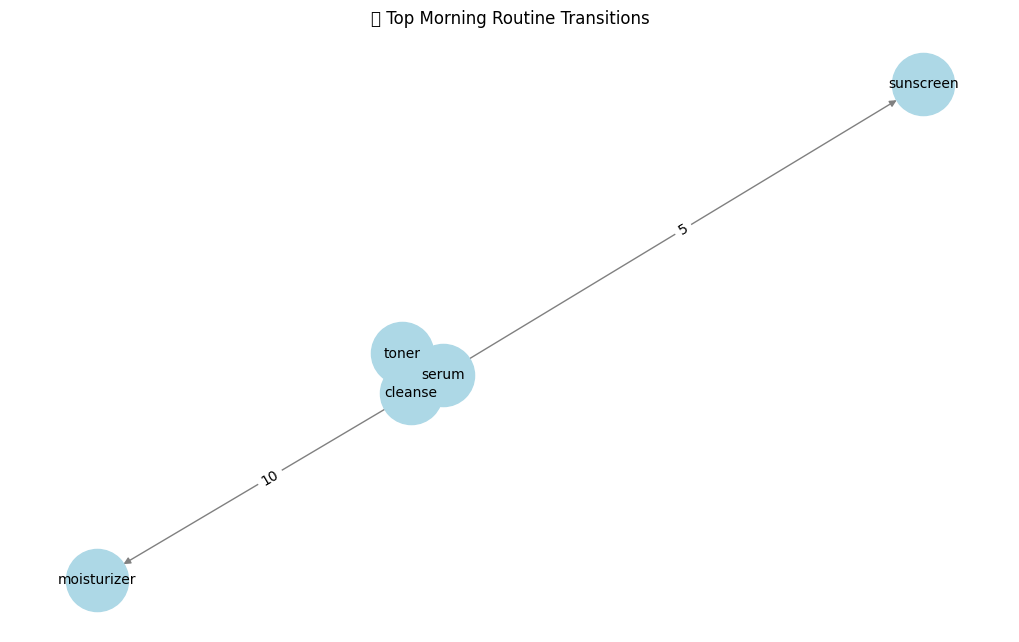

/Users/ritushetkar/env_capstone/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


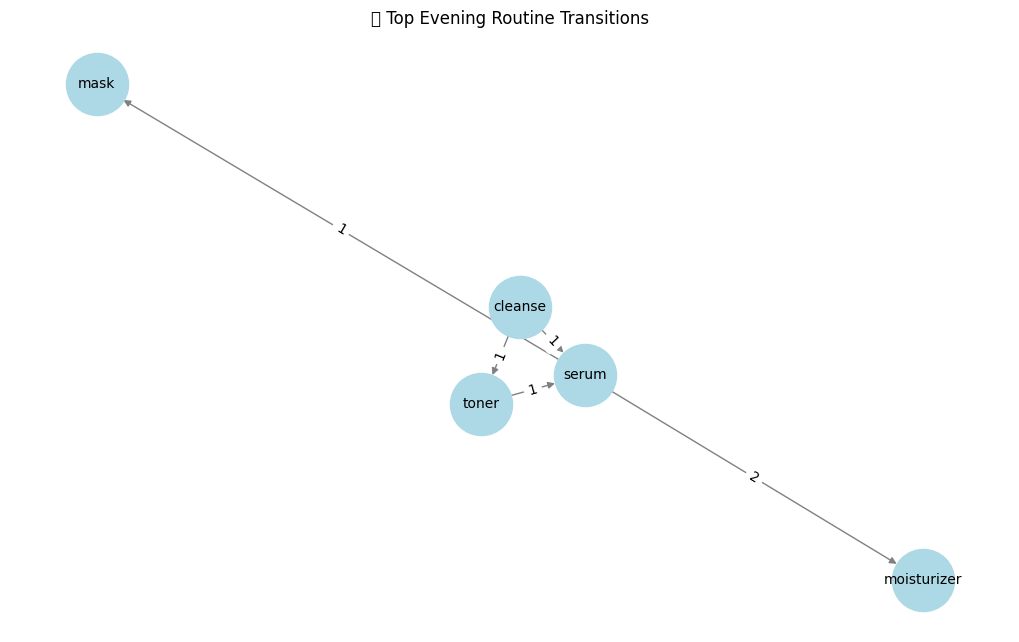

In [105]:
import matplotlib.pyplot as plt
import networkx as nx

# For demo purposes, let's limit to top 10 transitions for clarity
top_n = 5
morning_edges = list(morning_transitions.items())[:top_n]
evening_edges = list(evening_transitions.items())[:top_n]

# Helper function to create a directed graph from transitions
def create_graph(edges, title):
    G = nx.DiGraph()
    G.add_weighted_edges_from([(a, b, w) for (a, b), w in edges])
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot graphs
create_graph(morning_edges, "🌅 Top Morning Routine Transitions")
create_graph(evening_edges, "🌙 Top Evening Routine Transitions")


In [106]:

# Display sample rows for morning and evening
morning_examples = df_sentence_level[df_sentence_level['time_of_day'] == 'morning']
evening_examples = df_sentence_level[df_sentence_level['time_of_day'] == 'night']

morning_examples

,sentence,step,time_of_day,sentiment,video_id
24,the host says the oats will absorb excess oil ...,oil,morning,neutral,NaN
32,the video features a young woman named chiara ...,mask,morning,neutral,NaN
42,among her favorites are peach slices snail res...,toner,morning,negative,NaN
43,among her favorites are peach slices snail res...,serum,morning,negative,NaN
46,she uses la roche-posay toleriane purifying fo...,cleanse,morning,positive,NaN
...,...,...,...,...,...
14644,an esthetician shares an affordable morning sk...,sunscreen,morning,neutral,7.464319e+18
14645,an esthetician shares an affordable morning sk...,oil,morning,neutral,7.464319e+18
14652,she puts cream around her eyes and then uses t...,moisturizer,morning,neutral,NaN
14653,"now, it's time for the famous pdrn jelly gel m...",mask,morning,positive,NaN


In [ ]:
## 
morning_examples[morning_examples['video_id']==7483837390394559766]

,sentence,step,time_of_day,sentiment,video_id
24,the host says the oats will absorb excess oil ...,oil,morning,neutral,7483837390394559766
32,the video features a young woman named chiara ...,mask,morning,neutral,7483837390394559766


So the approach above was good to find routines, if from the data we could validate what really were the routine steps. After even the sentence level matching, the frequency of routine steps was really low to make the right interpretation.

In [ ]:
# Import libraries
import pandas as pd
import spacy
from spacy.matcher import PhraseMatcher
from collections import Counter
from itertools import chain
import plotly.graph_objects as go
from tqdm import tqdm

# Load csv file with comments
df = pd.read_csv("../data/comments_post.csv")
comments = df['text_comment'].dropna().tolist()

#SAMPLE_SIZE = 500  # Speed up for test
#comments = comments[:SAMPLE_SIZE]

C:\Users\Surface\AppData\Local\Temp\ipykernel_13756\2911404079.py:11: DtypeWarning:

Columns (12,34) have mixed types. Specify dtype option on import or set low_memory=False.



Define product and ingredient synonyms

In [ ]:
# Ingredient synonym groups (EN/DE) mapped to unified names
ingredient_map = {
    "hyaluronic acid": ["hyaluronic acid", "hyaluronsäure"],
    "glycerin": ["glycerin"],
    "panthenol": ["panthenol"],
    "squalane": ["squalane", "squalan"],
    "aloe vera": ["aloe vera"],
    "niacinamide": ["niacinamide", "niacinamid"],
    "vitamin c": ["vitamin c"],
    "alpha arbutin": ["alpha arbutin", "alpha-arbutin"],
    "licorice root": ["licorice root", "lakritzextrakt"],
    "kojic acid": ["kojic acid", "kojicsäure"],
    "retinol": ["retinol"],
    "peptides": ["peptides", "peptide"],
    "bakuchiol": ["bakuchiol"],
    "coenzyme q10": ["coenzyme q10", "coenzym q10"],
    "ceramides": ["ceramides", "ceramide"],
    "salicylic acid": ["salicylic acid", "salicylsäure"],
    "glycolic acid": ["glycolic acid", "glycolsäure"],
    "lactic acid": ["lactic acid", "milchsäure"],
    "pha": ["pha"],
    "benzoyl peroxide": ["benzoyl peroxide", "benzoylperoxid"],
    "centella asiatica": ["centella asiatica", "tigergras"],
    "green tea": ["green tea", "grüner tee"],
    "allantoin": ["allantoin"],
    "calendula": ["calendula", "ringelblume"],
    "chamomile": ["chamomile", "kamille"]
}

# Product synonym groups (EN/DE) mapped to unified names
product_map = {
    "cleanser": ["cleanser", "reiniger", "gesichtsreinigung", "face wash"],
    "toner": ["toner", "gesichtswasser"],
    "serum": ["serum"],
    "essence": ["essence", "essenz"],
    "moisturizer": ["moisturizer", "feuchtigkeitscreme"],
    "sunscreen": ["sunscreen", "sonnencreme"],
    "eye cream": ["eye cream", "augencreme"],
    "exfoliator": ["exfoliator", "peeling"],
    "spot treatment": ["spot treatment", "punktbehandlung"],
    "micellar water": ["micellar water", "mizellenwasser"],
    "night cream": ["night cream", "nachtcreme"],
    "face oil": ["face oil", "gesichtsöl"],
    "mask": ["mask", "maske"]
}

In [ ]:
# build a list of all terms for matching
all_ingredient_terms = [term for group in ingredient_map.values() for term in group]
all_product_terms = [term for group in product_map.values() for term in group]
all_keywords = list(set(all_ingredient_terms + all_product_terms))

nlp = spacy.blank("xx")  # multilingual pipeline
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(term) for term in all_keywords]
matcher.add("SKINCARE", patterns)

# Normalize Matched Terms to Unified Names
def normalize_term(term):
    term_lower = term.lower()
    for name, synonyms in {**ingredient_map, **product_map}.items():
        if term_lower in synonyms:
            return name
    return term_lower

# process all comments in batch (pipe)
results = []

for doc in tqdm(nlp.pipe(comments, batch_size=50), total=len(comments)):
    matches = matcher(doc)
    matched = [doc[start:end].text for _, start, end in matches]
    normalized = [normalize_term(t) for t in matched]

    sequence = [token.text for token in doc if token.text.lower() in all_keywords]
    normalized_sequence = [normalize_term(t) for t in sequence]

    results.append({
        "normalized_items": normalized,
        "routine_sequence": normalized_sequence
    })

results_df = pd.DataFrame(results)

# Frequency analysis
all_normalized = list(chain.from_iterable(results_df['normalized_items']))
freq = Counter(all_normalized)
top_items_df = pd.DataFrame(freq.most_common(30), columns=['Item', 'Frequency'])
top_items_df.head(30)

100%|██████████| 54237/54237 [00:17<00:00, 3097.69it/s]


,Item,Frequency
0,cleanser,1151
1,serum,980
2,toner,943
3,moisturizer,626
4,sunscreen,594
5,mask,579
6,vitamin c,379
7,retinol,321
8,exfoliator,152
9,niacinamide,140


Sankey diagramm (common routines)

In [ ]:
# Extract 2-step transitions
routine_sequences = results_df['routine_sequence'].dropna().tolist()
routine_sequences = [tuple(seq) for seq in routine_sequences if len(seq) > 1]

edges = []
for routine in routine_sequences:
    for i in range(len(routine) - 1):
        edges.append((routine[i], routine[i + 1]))

edge_counts = Counter(edges)

# Sankey input
labels = list(set([e[0] for e in edge_counts] + [e[1] for e in edge_counts]))
label_to_index = {label: i for i, label in enumerate(labels)}
source_indices = [label_to_index[src] for (src, tgt) in edge_counts]
target_indices = [label_to_index[tgt] for (src, tgt) in edge_counts]
values = list(edge_counts.values())

# Plot Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="gray", width=0.5), label=labels),
    link=dict(source=source_indices, target=target_indices, value=values)
)])
fig.update_layout(title_text="Skincare Routine Flow (All Comments)", font_size=12)
fig.show()


Common routines and example comment

In [ ]:
# Helper function to remove consecutive duplicates from a routine
def remove_consecutive_duplicates(seq):
    return [x for i, x in enumerate(seq) if i == 0 or x != seq[i - 1]]

# Extract routine sequences from the DataFrame
routine_sequences = results_df['routine_sequence'].dropna().tolist()

# Clean each sequence and filter out short ones
routine_sequences = [
    tuple(remove_consecutive_duplicates(seq))
    for seq in routine_sequences
    if len(remove_consecutive_duplicates(seq)) > 1
]

# Count how often each cleaned routine occurs
from collections import Counter
routine_counts = Counter(routine_sequences)

# Create a DataFrame from the routine counts
routine_df = pd.DataFrame([
    {"Routine": " → ".join(routine), "Frequency": count}
    for routine, count in routine_counts.items()
])

# Filter routines by minimum frequency (e.g. at least 10)
routine_df = routine_df[routine_df['Frequency'] >= 10].sort_values(by='Frequency', ascending=False)

# Find an example comment for each routine
examples = []

for i, seq in enumerate(results_df['routine_sequence']):
    if not isinstance(seq, list) or len(seq) < 2:
        continue

    cleaned_seq = tuple(remove_consecutive_duplicates(seq))
    
    if cleaned_seq in routine_counts and routine_counts[cleaned_seq] >= 10:
        examples.append({
            "Routine": " → ".join(cleaned_seq),
            "ExampleComment": comments[i]
        })

# Create example DataFrame and remove duplicates per routine
example_df = pd.DataFrame(examples).drop_duplicates(subset="Routine")

# Merge example comments with the routine frequency table
routine_df = routine_df.merge(example_df, on="Routine", how="left")

# Display routine with frequency and example comment
print(routine_df[['Routine', 'Frequency', 'ExampleComment']])


                               Routine  Frequency  \
0                        toner → serum         37   
1               cleanser → moisturizer         27   
2              moisturizer → sunscreen         25   
3                  serum → moisturizer         24   
4                  niacinamide → serum         21   
5                     cleanser → toner         19   
6                      retinol → serum         19   
7   cleanser → moisturizer → sunscreen         15   
8                     toner → cleanser         14   
9              sunscreen → moisturizer         13   
10                       serum → toner         12   
11            cleanser → toner → serum         11   
12                     serum → retinol         11   
13                cleanser → sunscreen         11   
14                    peptides → serum         10   
15                 toner → moisturizer         10   
16               exfoliator → cleanser         10   

                                       Exampl